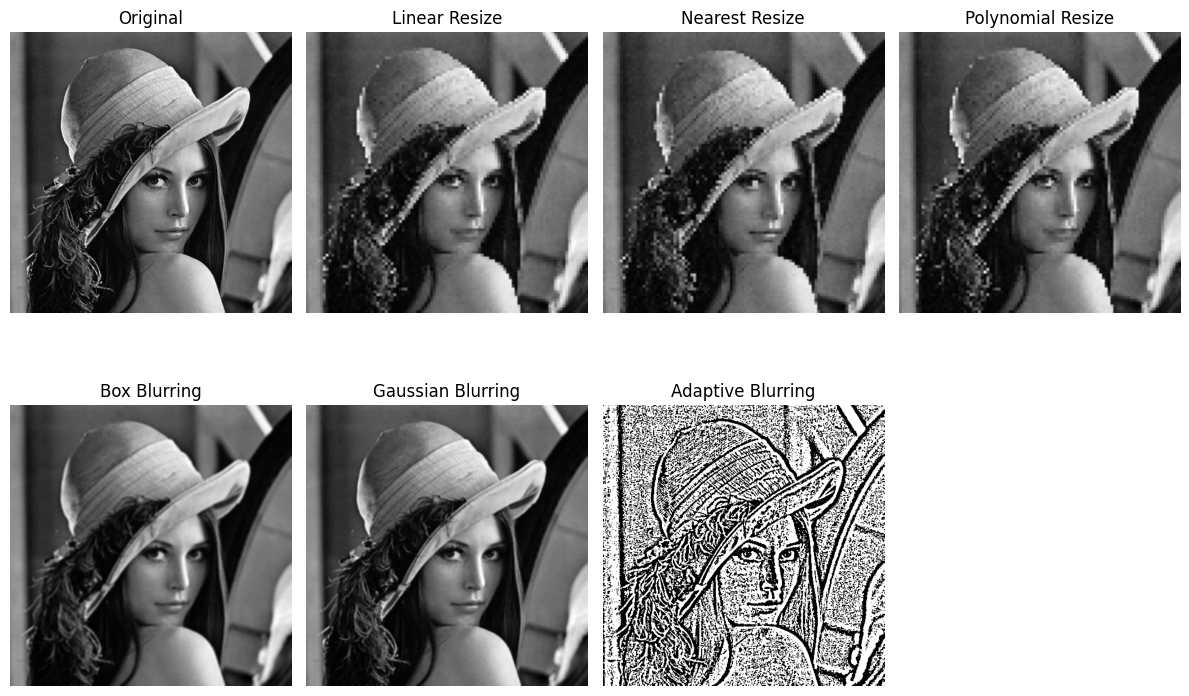

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('lab 1 image acava.jpg', cv2.IMREAD_GRAYSCALE)

# 1.1 Resizing
linear_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
nearest_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)
polynomial_resized = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)

# 1.2 Blurring
box_blurred = cv2.blur(image, (5, 5))
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)
# Adaptive blurring (example: adaptive thresholding)
adaptive_blurred = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY, 11, 2)

# Plot results
titles = ['Original', 'Linear Resize', 'Nearest Resize', 'Polynomial Resize',
          'Box Blurring', 'Gaussian Blurring', 'Adaptive Blurring']
images = [image, linear_resized, nearest_resized, polynomial_resized,
          box_blurred, gaussian_blurred, adaptive_blurred]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load MNIST dataset
data = load_digits()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = auc(*roc_curve(y_test, y_prob[:, 1], pos_label=1)[:2])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.9861111111111112
Precision: 0.9871533861771657
Recall: 0.9865978306216103
F1-Score: 0.9868277979964809
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]
ROC-AUC: 1.0
